## Importing the necessary tools and load the dataset.🧰

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#  Exploraation of data

In [3]:
data = pd.read_csv('Uber_dataSet.csv')

In [4]:
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [5]:
# Creating copy of data
clean_data = data.copy()

In [6]:
clean_data.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [7]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [8]:
clean_data.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [13]:
print("DataSet Describtion")
clean_data.describe()

DataSet Describtion


,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [10]:
clean_data.shape

(150000, 21)

In [11]:
print("object data type Column's")
for col in clean_data.select_dtypes(include=['object']):
    print(col)

object data type Column's
Date
Time
Booking ID
Booking Status
Customer ID
Vehicle Type
Pickup Location
Drop Location
Reason for cancelling by Customer
Driver Cancellation Reason
Incomplete Rides Reason
Payment Method


In [12]:
print("Numeric data type column's")
for col in clean_data.select_dtypes(include=['number']):
    print(col)

Numeric data type column's
Avg VTAT
Avg CTAT
Cancelled Rides by Customer
Cancelled Rides by Driver
Incomplete Rides
Booking Value
Ride Distance
Driver Ratings
Customer Rating


In [14]:
# Duplicate rows
clean_data.duplicated().sum()

np.int64(0)

In [15]:
# null or missing values
clean_data.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

# Missing value explantion
- since (Avg CTAT, Incomplete Rides, Incomplete Rides Reason, Booking Value, 
         Ride Distance, Driver Ratings, Customer Rating, Payment Method..)
- Above contain missing values but all are natural not error or wrong may be beacuse of cancelltion

### This can't coantain values at same time
- Cancelled Rides by Customer & Reason for cancelling by Customer  
- Cancelled Rides by Driver & Driver Cancellation Reason  
- Incomplete Rides & Incomplete Rides Reason  

#  Step - Data Cleaning And Pre-Processing

In [17]:
# Combine 'date' + 'Time' in single column

clean_data['date_time'] = pd.to_datetime(clean_data['Date']+' '+clean_data['Time'])

# Extract 'Month-Day-Hour-' form 'date_time'
clean_data['Month'] = clean_data['date_time'].dt.month
clean_data['Day'] = clean_data['date_time'].dt.day_name()
clean_data['Hour'] = clean_data['date_time'].dt.hour

clean_data = clean_data.sort_values(by='date_time')

#Re - ordering
new_cols = ['Month','Day','Hour']
clean_data = clean_data[new_cols+[c for c in clean_data.columns if c not in new_cols]]

clean_data = clean_data.reset_index(drop = True)

In [18]:
clean_data = clean_data.drop(['Date','Time'], axis = 1)
clean_data.head()

,Month,Day,Hour,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,date_time
0,1,Monday,0,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,Ambience Mall,10.8,38.9,NaN,NaN,NaN,NaN,NaN,NaN,99.0,37.98,4.8,4.8,Cash,2024-01-01 00:19:34
1,1,Monday,1,"""CNR9147645""",Completed,"""CID8300238""",Go Mini,Basai Dhankot,Madipur,8.5,15.1,NaN,NaN,NaN,NaN,NaN,NaN,114.0,39.29,4.2,4.1,Uber Wallet,2024-01-01 01:35:18
2,1,Monday,1,"""CNR1009222""",Cancelled by Driver,"""CID2030746""",Go Sedan,Tughlakabad,Greater Kailash,7.4,NaN,NaN,NaN,1.0,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:37:50
3,1,Monday,1,"""CNR2740479""",Cancelled by Driver,"""CID3231181""",Auto,Palam Vihar,Kherki Daula Toll,5.6,NaN,NaN,NaN,1.0,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:48:03
4,1,Monday,1,"""CNR7650148""",Cancelled by Driver,"""CID3381661""",Go Sedan,Narsinghpur,Pulbangash,6.2,NaN,NaN,NaN,1.0,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:49:56


### Since Now  Dataset Is cleaned as per our requiremnt 

# Step > Exploratory Data Analysis

- Booking distribution by Months

In [19]:
# mean booking per month
month_mean = clean_data.groupby("Month").size().groupby(level=0).mean()

# or similer
month_mean = clean_data.groupby('Month').size().reindex(range(1,13), fill_value=0)

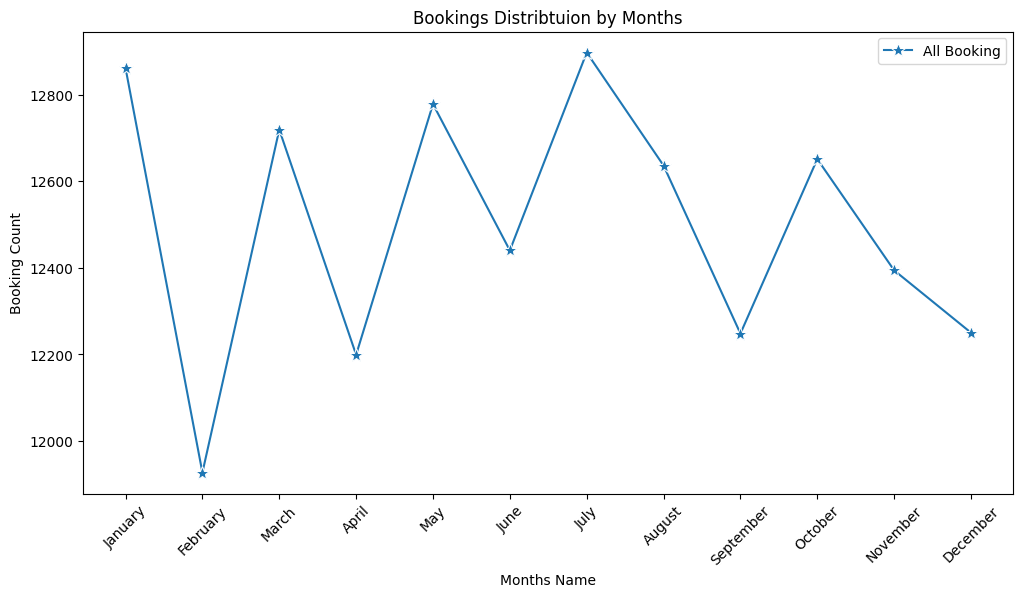

In [33]:
plt.figure(figsize=(12,6))
sns.lineplot(
    x = month_mean.index,
    y = month_mean.values,
    marker='*',
    markersize = 10,
    label = 'All Booking'
)

month_labels = ['January', 'February', 'March', 'April',
                'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.xlabel('Months Name')
plt.ylabel('Booking Count')
plt.title('Bookings Distribtuion by Months')
plt.xticks(ticks=range(1,13),
           labels= month_labels,
           rotation = 45
          )
plt.legend()
plt.show()

- Booking Distribution By Days

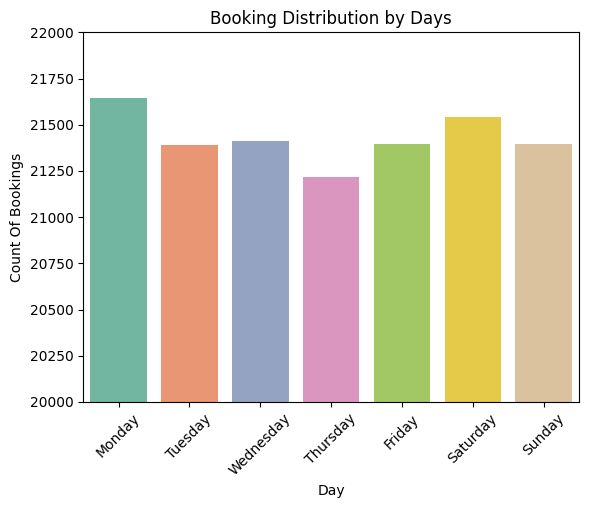

In [37]:
sns.countplot(
    x = 'Day',
    palette='Set2',
    data = clean_data,
    hue='Day',
)
plt.title('Booking Distribution by Days')
plt.ylabel('Count Of Bookings')
plt.xticks(rotation = 45)
plt.ylim(20000,22000)         
plt.show()

- Booking Heatmap based on Hour V/S Day

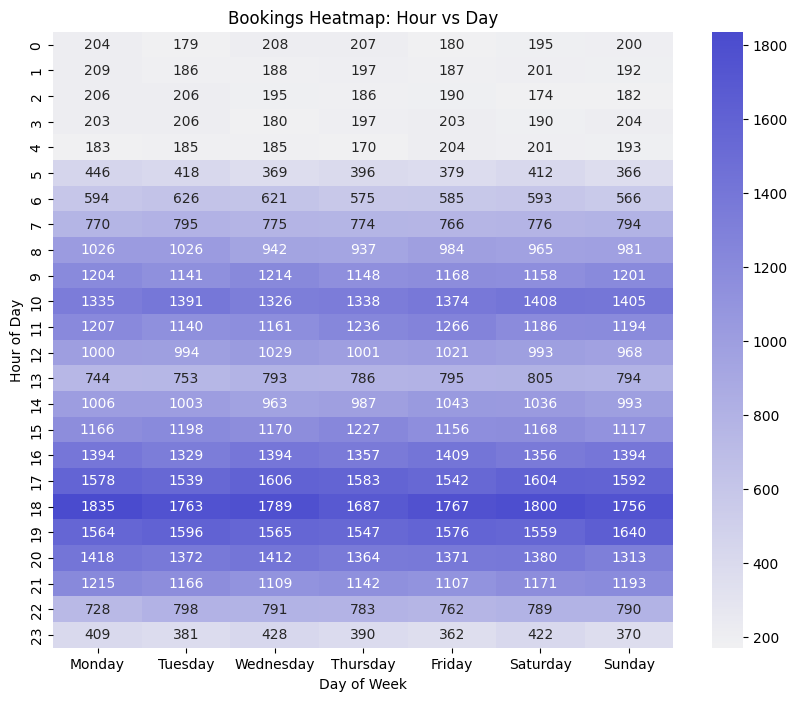

In [42]:
from seaborn import light_palette
order_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# pivot table: rows=hour, columns=day, values=number of bookings

heatmap_data = clean_data.pivot_table(
    index = 'Hour',
    columns='Day',
    values= 'Booking ID',
    aggfunc= 'count',
).reindex(columns=order_days)


plt.figure(figsize=(10,8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt = 'd',
    cmap=light_palette("#4a4bce", as_cmap = True)
)
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.title("Bookings Heatmap: Hour vs Day")
plt.show()

- Booking Status Distribution

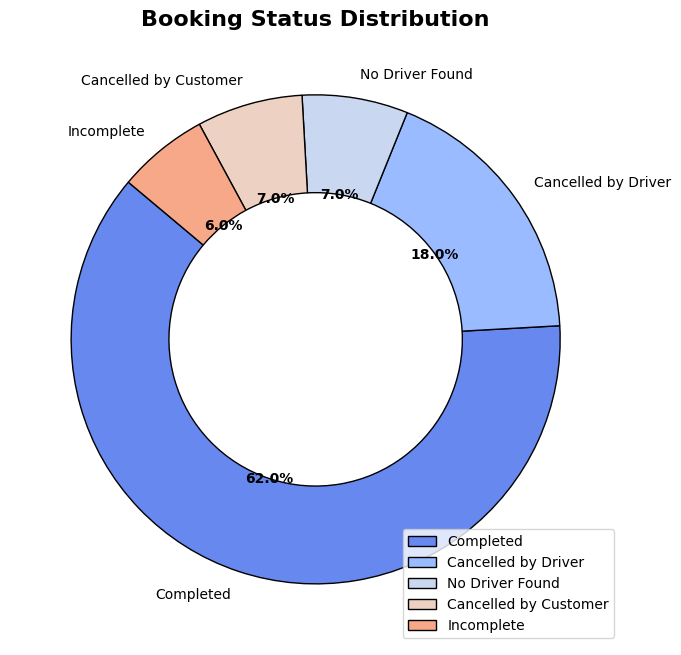

In [52]:
count_data = clean_data['Booking Status'].value_counts()

total_count = count_data.sum()

fig, ax = plt.subplots(figsize = (7,7))

# Donut chart

wedges, texts , autotexts = ax.pie(
    count_data,
    labels = count_data.index,
    autopct = '%1.1f%%',
    startangle = 140,
    colors = sns.color_palette('coolwarm'),
    wedgeprops = dict(width =0.4, edgecolor = 'black')
)
# text Style
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.title("Booking Status Distribution", fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.legend()
plt.show()

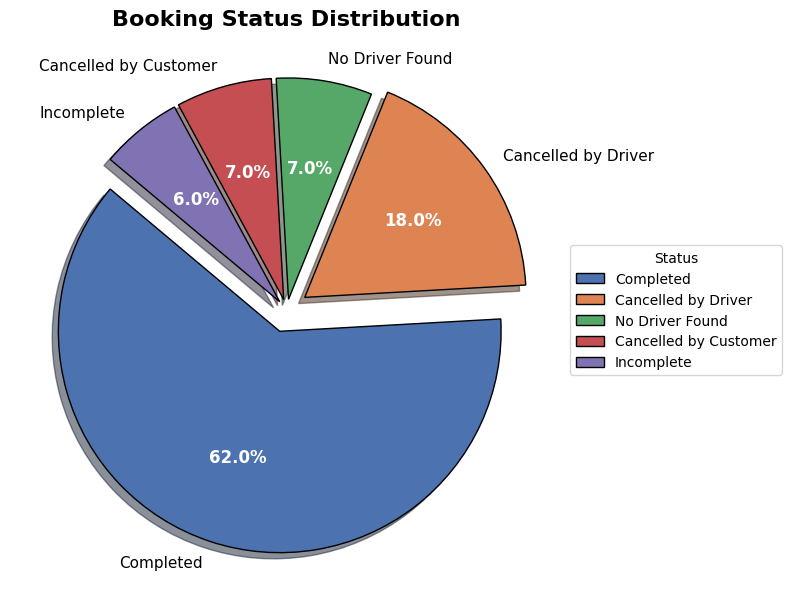

In [56]:
#Count occurrences of each booking status
counts = clean_data['Booking Status'].value_counts()

#Total booking status
total = counts.sum()

#Define explosion to highlight important segments (>15%)
explode = [0.1 if (v / total) >= 0.15 else 0.05 for v in counts.values]

#Plot
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors = sns.color_palette("deep") ,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

#Style tweaks
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

#Title
ax.set_title("Booking Status Distribution", fontsize=16, fontweight='bold')

#Legend (in case labels overlap)
ax.legend(wedges, counts.index, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

## Key Insights

- a) Completed Bookings ✅

- 62% of all bookings are successfully completed.

### This indicates that the majority of the platform’s services are executed without issues.

- b) Cancelled by Driver 🚖

- 18% of bookings are cancelled by drivers.

### This is the second-largest segment, suggesting a potential operational issue.

- c) No Driver Found 🛑

- 7% of bookings fail due to unavailability of drivers.

### May indicate supply-demand imbalance or driver shortages in certain areas/times.

- d) Cancelled by Customer ❌

- 7% of bookings are cancelled by customers.

### This could be due to pricing issues, delays, or changing plans.

- e) Incomplete Bookings ⚠️

- 6% of bookings remain incomplete.

### Could be caused by technical failures, payment issues, or mid-process cancellations.

## 2. Business Implications & Recommendations

- ✅ High success rate (62%) → Positive sign but still room for improvement.

- 🚖 18% driver cancellations → Investigate driver behavior, incentives, and cancellation penalties.

- 🛑 7% no-driver cases → Increase driver availability during peak hours or high-demand regions.

- ❌ Customer cancellations (7%) → Improve ETA accuracy, pricing transparency, and customer experience.

- ⚠️ Incomplete bookings → Check app performance, payment gateways, and streamline workflows.

- Reason For Each Booking Status :

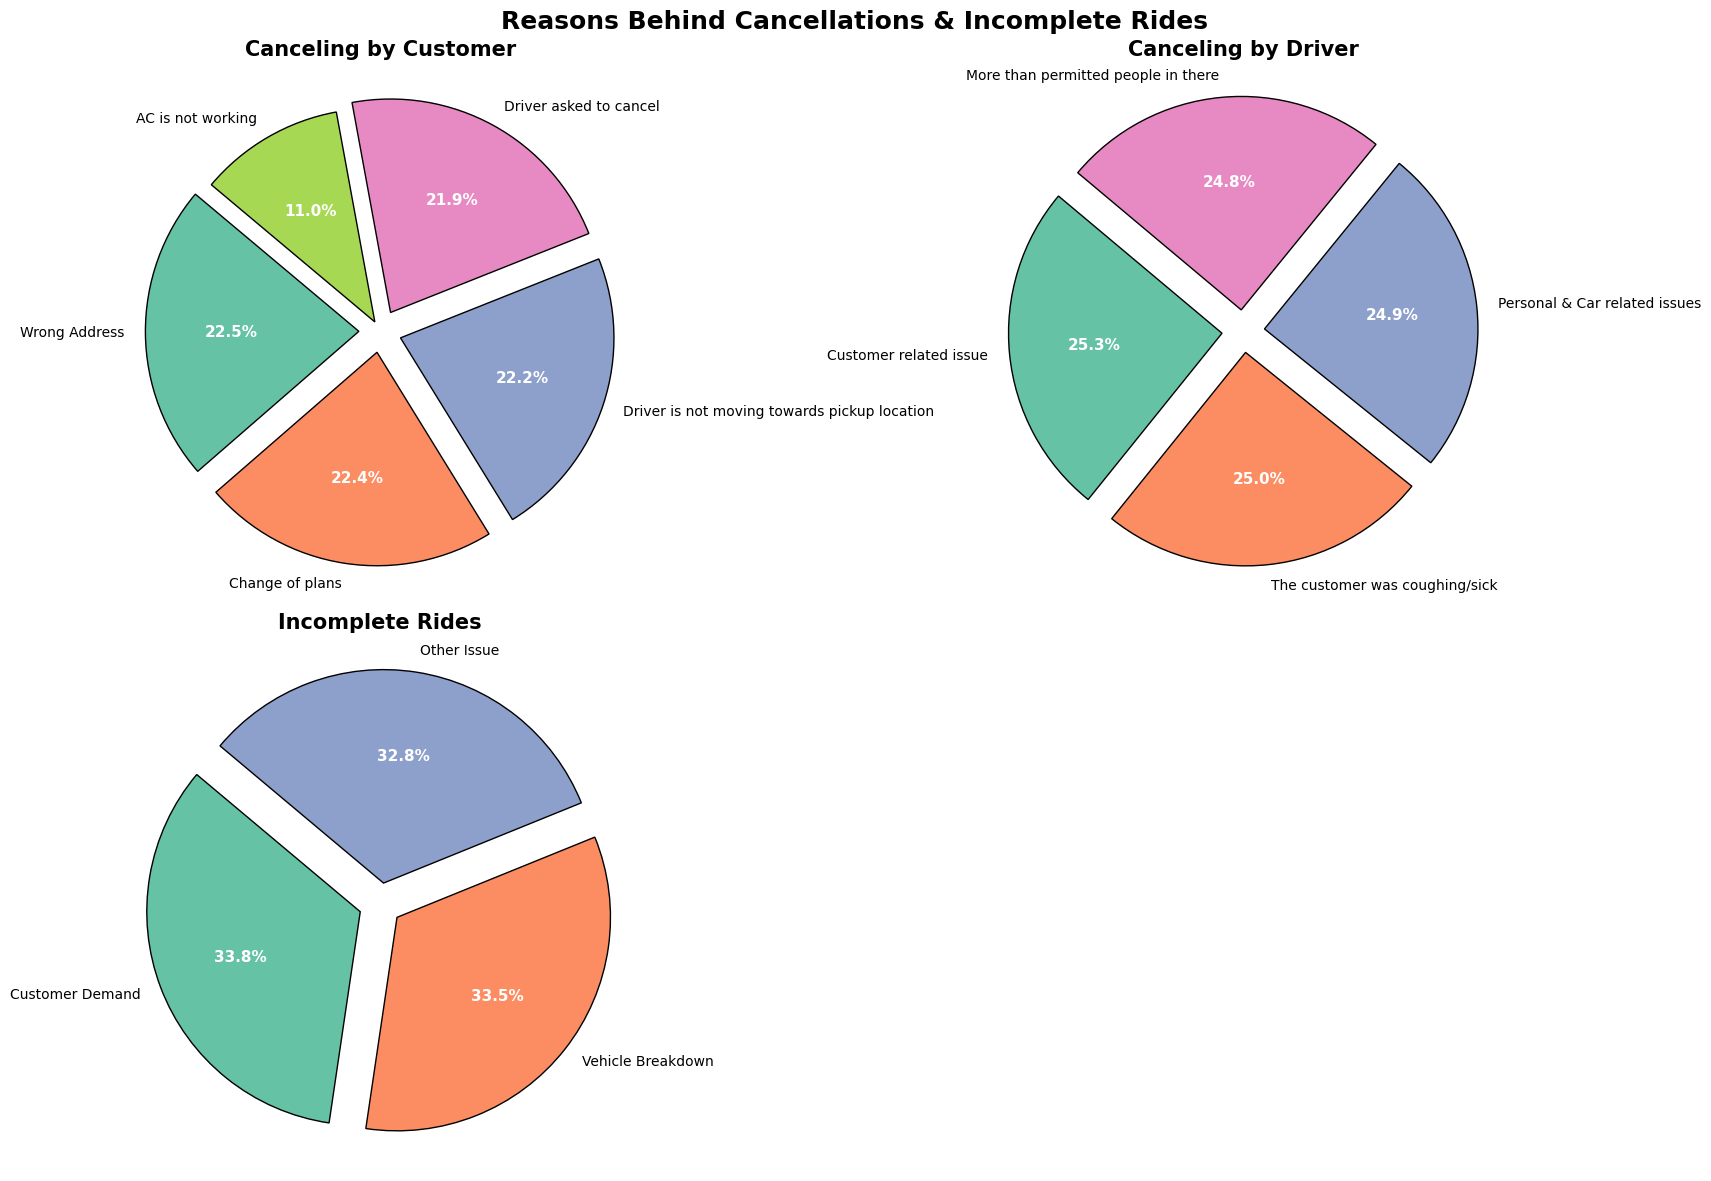

In [62]:
reason_col = ["Reason for cancelling by Customer", "Driver Cancellation Reason",
              "Incomplete Rides Reason"]
titles = ["Canceling by Customer", "Canceling by Driver", "Incomplete Rides"]

fig , axes = plt.subplots(2,2 , figsize=(16,12))

axes = axes.flatten()

for i, (col, title) in enumerate(zip(reason_col, titles)):
    count_data = clean_data[col].value_counts(dropna=True)
    total_count = count_data.sum()

    explode = [0.1 if v / total_count >= 0.15 else 0.05 for v in count_data.values]

    wedges , texts, autotexts = axes[i].pie(
    count_data,
        labels=count_data.index,
        autopct='%1.1f%%',
        startangle=140,  
        explode=explode,
        wedgeprops={'edgecolor': 'black'},
        colors=sns.color_palette("Set2"), 
    )

    for text in texts:
        text.set_fontsize(10)
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    axes[i].set_title(title, fontsize=15, fontweight='bold')
    axes[i].set_aspect('equal')

fig.delaxes(axes[3]) # removing extra 4th subplot
fig.suptitle("Reasons Behind Cancellations & Incomplete Rides", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

- Cancellation by Driver Rate Analysis by Hour

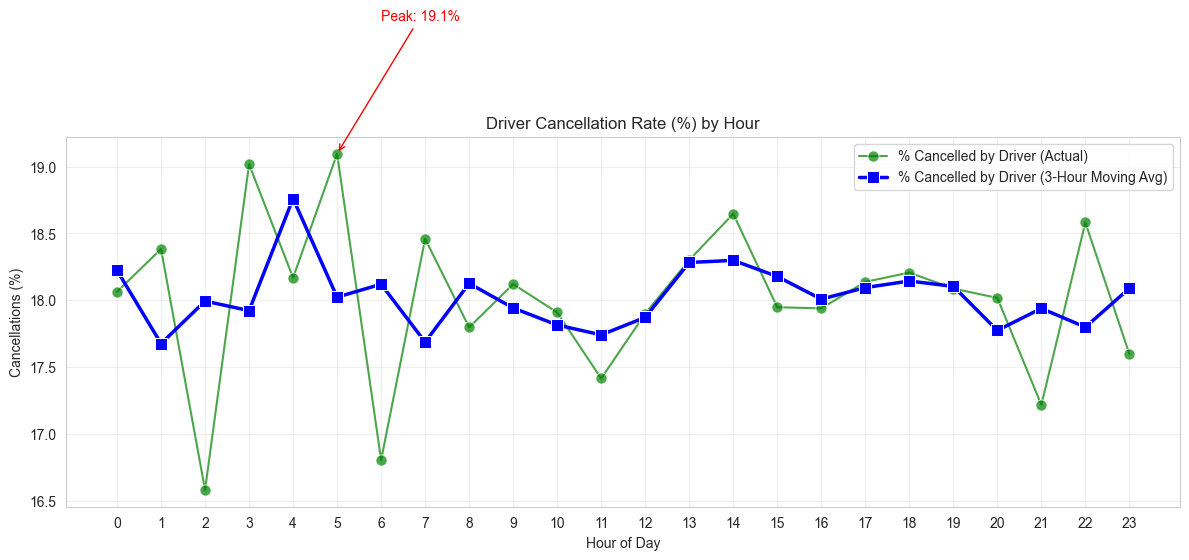

In [72]:
# Calculate counts for each hour
hours_count = clean_data['Hour'].value_counts().reindex(range(24), fill_value=0)

# Filter cancellations by driver
status_counts = clean_data[clean_data['Booking Status'] == 'Cancelled by Driver']['Hour'] \
                .value_counts().reindex(range(24), fill_value=0)

# Calculate cancellation rate (%)
status_rate = (status_counts / hours_count.replace(0, np.nan) * 100).fillna(0)

# 3-hour moving average for smoothing
window_size = 3
moving_avg = status_rate.rolling(window=window_size, center=True, min_periods=1).mean()

# Set seaborn style for cleaner visualization
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual cancellation rate
sns.lineplot(
    x=status_rate.index,
    y=status_rate.values,
    marker='o',
    markersize=8,
    label='% Cancelled by Driver (Actual)',
    color='green',
    alpha=0.7,
    ax=ax
)

# Plot moving average
sns.lineplot(
    x=moving_avg.index,
    y=moving_avg.values,
    marker='s',
    markersize=8,
    label=f'% Cancelled by Driver ({window_size}-Hour Moving Avg)',
    color='blue',
    linewidth=2.5,
    ax=ax
)

# Find peak hour & annotate it
peak_hour = status_rate.idxmax()
peak_value = status_rate.max()
ax.annotate(f'Peak: {peak_value:.1f}%',
            xy=(peak_hour, peak_value),
            xytext=(peak_hour + 1, peak_value + 1),
            arrowprops=dict(arrowstyle="->", color='red'),
            fontsize=10,
            color='red')

# Labels & title
ax.set(
    xlabel="Hour of Day",
    ylabel="Cancellations (%)",
    title="Driver Cancellation Rate (%) by Hour",
    xticks=range(24)
)

# Legend settings
ax.legend(loc="upper right", bbox_to_anchor=(1, 1))

# Grid & layout
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- The driver cancellation rate remains relatively stable over the day with minor fluctuations.
- Peak driver cancellation period: 4-5 AM
- Lowest driver cancellation time: 2 AM

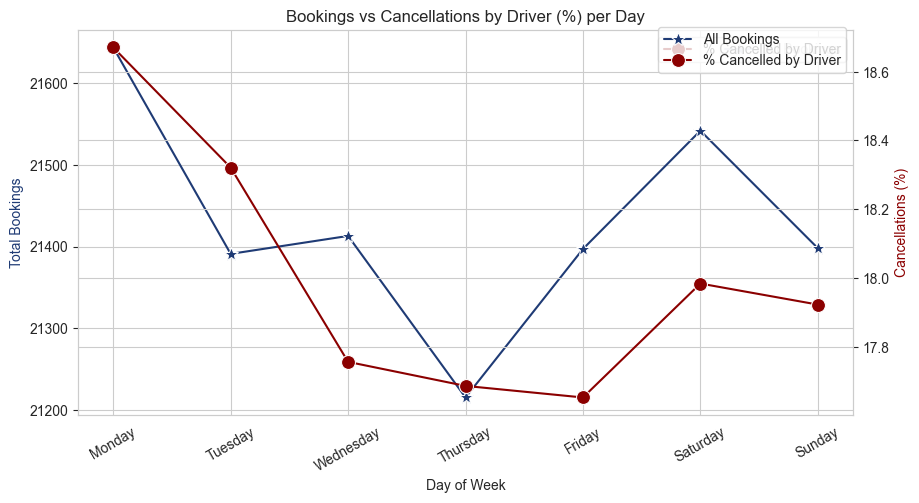

In [75]:
days_count = clean_data.groupby('Day').size().reindex(order_days, fill_value=0)

cancellations_count = clean_data[clean_data['Booking Status'] == "Cancelled by Driver"].groupby(
    "Day").size().reindex(order_days, fill_value=0)

cancel_rate = (cancellations_count / days_count.replace(0 , np.nan) * 100).fillna(0)

fig , ax2 = plt.subplots(figsize =(10,5))

sns.lineplot(
    x = days_count.index,
    y = days_count.values,
    marker = '*',
    markersize = 10,
    label="All Bookings", 
    color= "#1f3b75",
    ax=ax2
)
ax2.set_xlabel("Day of Week")
ax2.set_ylabel("Total Bookings", color = "#1f3b75")


ax3 = ax2.twinx()
sns.lineplot(
    x = cancel_rate.index,
    y = cancel_rate.values,
    marker = 'o',
    markersize = 10,
    label = "% Cancelled by Driver",
    color = '#8b0000',
    ax= ax3
)
ax3.set_ylabel("Cancellations (%)", color="#8b0000")

plt.title("Bookings vs Cancellations by Driver (%) per Day")
ax2.set_xticks(range(0,7))
ax2.set_xticklabels(order_days, rotation = 30)
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9))
plt.show()

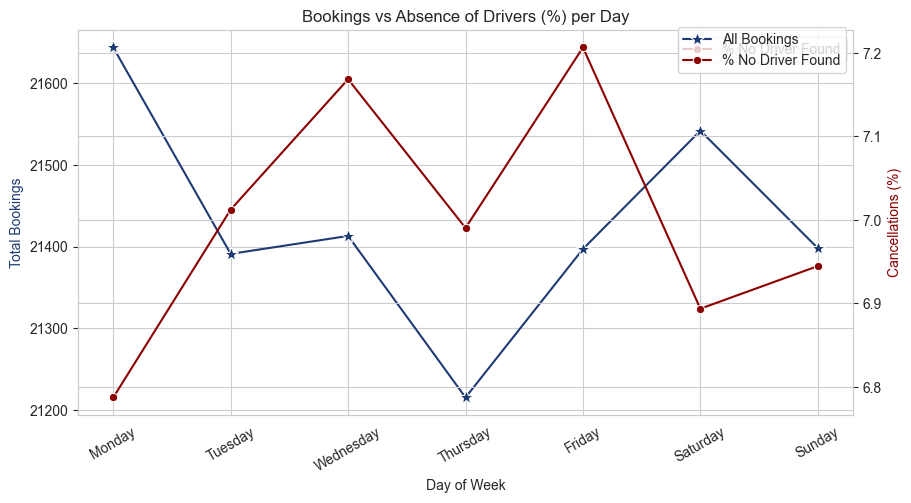

In [78]:
cancellation_res = clean_data[clean_data['Booking Status'] == 'No Driver Found'].groupby(
    'Day').size().reindex(order_days, fill_value=0)

cancel_rate = (cancellation_res / days_count.replace(0 , np.nan) * 100).fillna(0)

fig, ax1 = plt.subplots(figsize = (10,5))

sns.lineplot(
    x = days_count.index,
    y = days_count.values,
    marker  = '*',
    markersize = 10,
    label="All Bookings", 
    color="#1f3b75", 
    ax = ax1
)
ax1.set_xlabel("Day of Week")
ax1.set_ylabel("Total Bookings", color="#1f3b75")

ax2 = ax1.twinx()
sns.lineplot(
    x = cancel_rate.index,
    y = cancel_rate.values,
    marker='o',
    label="% No Driver Found",
    color="#8b0000",
    ax=ax2
)
ax2.set_ylabel("Cancellations (%)", color="#8b0000")


plt.title("Bookings vs Absence of Drivers (%) per Day")
ax1.set_xticks(range(0,7))
ax1.set_xticklabels(order_days, rotation=30)
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9))
plt.show()

In [ ]:
# Destinations where "No Driver Found :

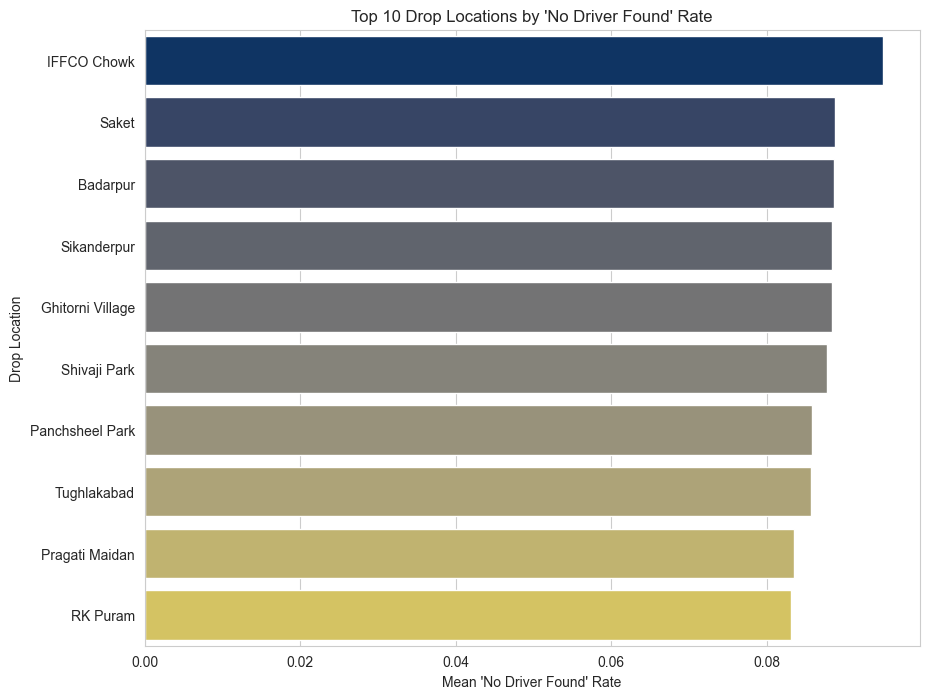

In [83]:
clean_data['No_Driver_Found'] = (clean_data['Booking Status'].str.strip() == 'No Driver Found'
                                ).astype(int)

mean_per_loc = clean_data.groupby('Drop Location')['No_Driver_Found'].mean().sort_values(ascending= False).head(10)

plt.figure(figsize=(10,8))
sns.barplot(
    x = mean_per_loc.values,
    y = mean_per_loc.index,
    palette='cividis',
    hue = mean_per_loc.index
)
plt.xlabel("Mean 'No Driver Found' Rate")
plt.ylabel("Drop Location")
plt.title("Top 10 Drop Locations by 'No Driver Found' Rate")
plt.show()

- Top 10 Drop Locations Mostly Active on Weekdays 

In [85]:
weekend = ['Saturday', 'Sunday']
clean_data['Day_Type'] = clean_data['Day'].apply(lambda x : 'Weekend' if x in weekend else 'Weekday')

location_activity = clean_data.groupby(['Drop Location', 'Day_Type']).size().unstack(fill_value=0)
location_activity['Total'] = location_activity['Weekday'] + location_activity['Weekend']
location_activity['Weekend_Ratio'] = location_activity['Weekend'] / location_activity['Total']
location_activity['Weekday_Ratio'] = location_activity['Weekday'] / location_activity['Total']

# Threshold for "mostly weekend" or "mostly weekday" (e.g., >70%)
mostly_weekend = location_activity[location_activity['Weekend_Ratio'] > 0.3].sort_values(by='Weekend_Ratio', ascending=False)
mostly_weekday = location_activity[location_activity['Weekday_Ratio'] > 0.3].sort_values(by='Weekday_Ratio', ascending=False)

print(mostly_weekend.shape)
print(mostly_weekend.head())

(37, 5)
Day_Type              Weekday  Weekend  Total  Weekend_Ratio  Weekday_Ratio
Drop Location                                                              
Pulbangash                547      279    826       0.337772       0.662228
Govindpuri                557      280    837       0.334528       0.665472
IIT Delhi                 579      277    856       0.323598       0.676402
Netaji Subhash Place      580      277    857       0.323221       0.676779
Rithala                   580      276    856       0.322430       0.677570


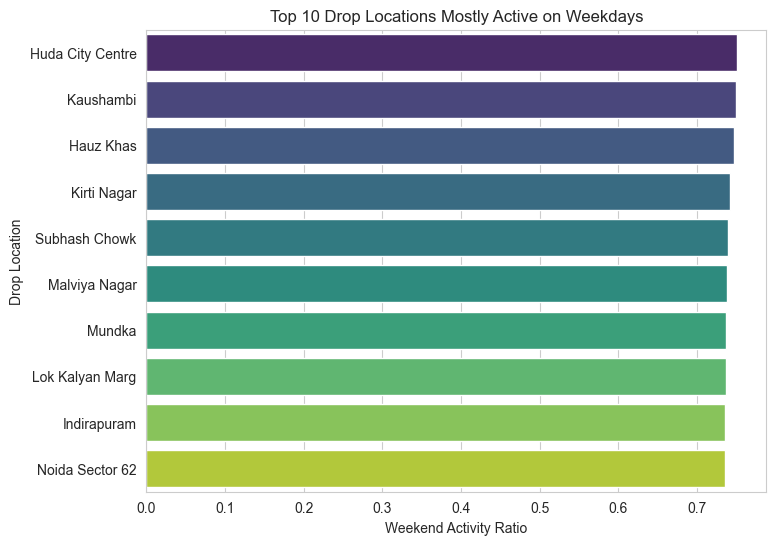

In [88]:
top_weekday = mostly_weekday['Weekday_Ratio'].head(10)

plt.figure(figsize=(8,6))
sns.barplot(
    x = top_weekday.values,
    y = top_weekday.index,
    palette = 'viridis',
    hue = top_weekday.index,
)
plt.xlabel("Weekend Activity Ratio")
plt.ylabel("Drop Location")
plt.title("Top 10 Drop Locations Mostly Active on Weekdays")
plt.show()

-  Booking Distribution with Destination "Huda City Centre" :

(60.0, 135.0)

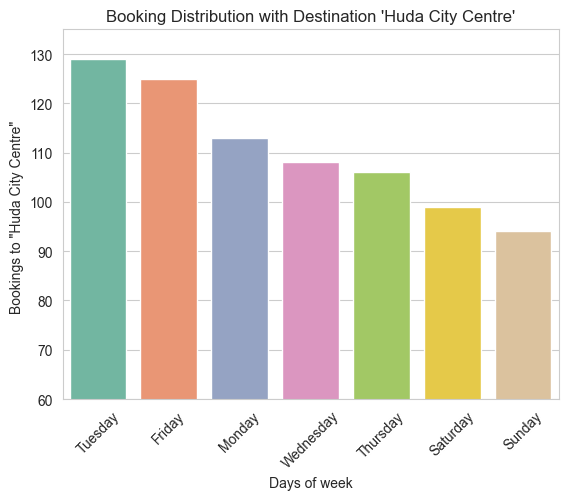

In [95]:
can_city = clean_data[clean_data['Drop Location'] == 'Huda City Centre']
cnti  = can_city.groupby('Day').size().reset_index(name = 'huda')
cnti = cnti.sort_values(by='huda', ascending = False)

sns.barplot(x = 'Day' , y ='huda' , data = cnti, hue ='Day')
plt.ylabel('Bookings to "Huda City Centre" ')
plt.xlabel('Days of week')
plt.xticks(rotation = 45)
plt.title("Booking Distribution with Destination 'Huda City Centre'")
plt.ylim(60,135)

- Most Popular Drop Locations by Day of Week

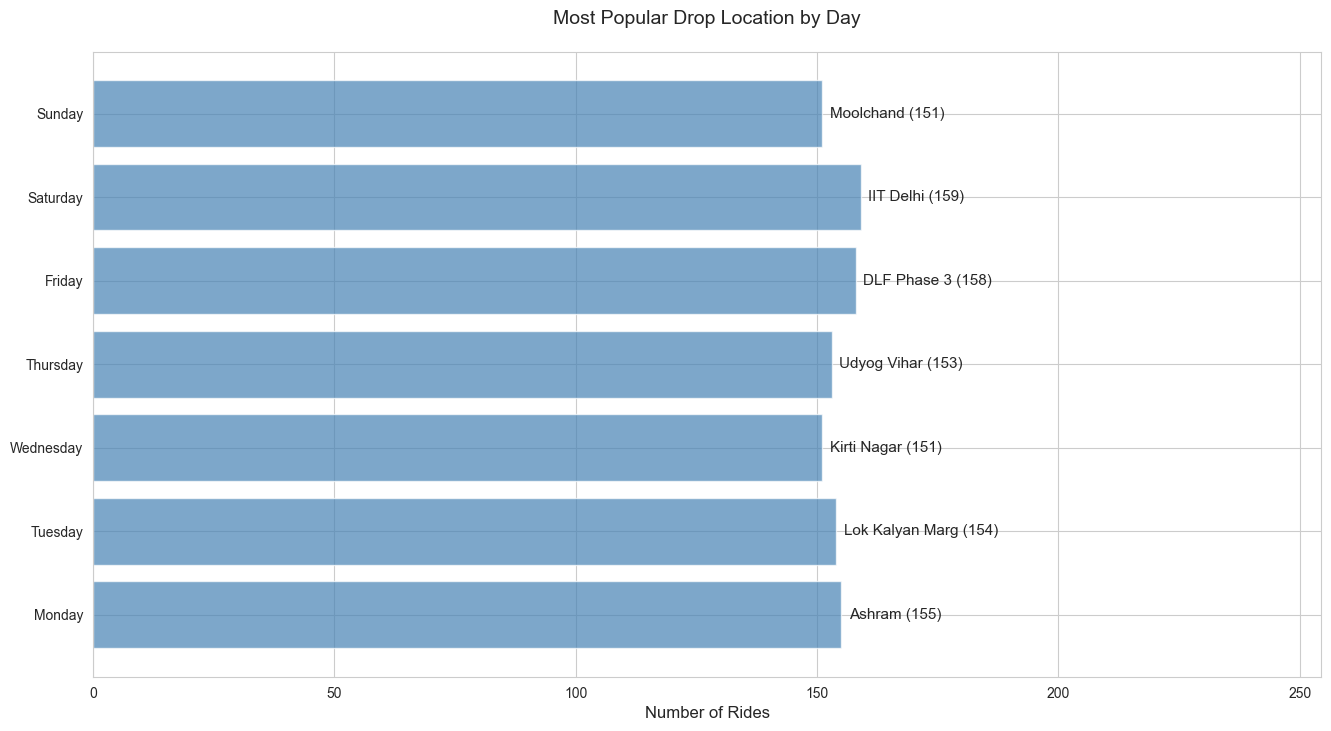

In [97]:
# Removing With null values
df = clean_data[['Drop Location','Day']].dropna()

top_locations_by_day = []
for Day in order_days:
    day_data = df[df['Day'] == Day]
    if not day_data.empty:
        top_locations = day_data['Drop Location'].value_counts().index[0]
        count = day_data['Drop Location'].value_counts().iloc[0]
        top_locations_by_day.append({
        'Day' : Day,
        'Top_Location' : top_locations,
        'Count' : count
        })

top_df = pd.DataFrame(top_locations_by_day)

fig = plt.figure(figsize=(14,8))

ax = plt.subplot(1,1,1)
if not top_df.empty:
    y_pos = np.arange(len(top_df))
    bars = ax.barh(y_pos, top_df['Count'], color = 'steelblue', alpha = 0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_df['Day'])
    ax.set_xlabel('Number of Rides', fontsize = 12)
    ax.set_title('Most Popular Drop Location by Day', fontsize=14, pad=20)

    # Location
    for i , (bar , location, count) in enumerate(zip(bars, top_df['Top_Location'], top_df['Count'])):
        display_name = location if len(location) <= 30 else location[:27] + "..."
        ax.text(bar.get_width() + max(top_df['Count']) * 0.01, bar.get_y() + bar.get_height()/2,
                f'{display_name} ({count:,})', va='center', ha='left', fontsize=11)
    
  
    ax.set_xlim(0, max(top_df['Count']) * 1.6)

plt.tight_layout(pad = 3.2)
plt.show()


In [102]:
print("=" * 80)
print("OVERALL STATISTICS")
print("=" * 80)
print(f"Total rides analyzed: {len(df):,}")
print(f"Total unique drop locations: {df['Drop Location'].nunique():,}")
print(f"Most popular location overall: {df['Drop Location'].value_counts().index[0]}")
print(f"Most popular location rides: {df['Drop Location'].value_counts().iloc[0]:,}")

#Day-wise ride distribution
print(f"\nRides per day:")
day_counts = df['Day'].value_counts().reindex(order_days)
for day, count in day_counts.items():
    if pd.notna(count):
        percentage = (count / len(df)) * 100
        print(f"  {day}: {count:,} rides ({percentage:.1f}%)")

OVERALL STATISTICS
Total rides analyzed: 150,000
Total unique drop locations: 176
Most popular location overall: Ashram
Most popular location rides: 936

Rides per day:
  Monday: 21,644 rides (14.4%)
  Tuesday: 21,391 rides (14.3%)
  Wednesday: 21,413 rides (14.3%)
  Thursday: 21,215 rides (14.1%)
  Friday: 21,397 rides (14.3%)
  Saturday: 21,542 rides (14.4%)
  Sunday: 21,398 rides (14.3%)


## Machine Learning : Customer Clustring¶

- Here , we will try to segment them based on the features: 'Total Rides', 'Ride Distance', 'Completion Rate', 'Booking Value', 'Rating', 'Preferred Payment'.

- completion flag and aggregate customer data 

In [104]:
clean_data['completion_Flag'] = (clean_data['Booking Status'] == 'Completed').astype(int)

customer_data = clean_data.groupby("Customer ID").agg(
    Total_Rides = ('Booking ID', 'count'),
    Completion_Ratio = ('completion_Flag', 'mean'),

    Avg_Booking_value = ('Booking Value', 'mean'),
    Avg_Distance = ('Ride Distance', 'mean'),
    Avg_Rating = ('Driver Ratings', 'mean')
).reset_index()

# Compute Preferred_Payment separately
preferred_payment = clean_data.groupby('Customer ID')['Payment Method'].agg(lambda x : x.mode()[0] if len(
    x.mode()) > 0 else 'Unknown').reset_index(name = 'Preferred_Payment')

customer_data = customer_data.merge(preferred_payment, on ="Customer ID")

- Handle missing values and perform clustering

In [105]:
customer_data["Avg_Distance"] = customer_data["Avg_Distance"].fillna(0)  # No completed rides = 0 distance
customer_data["Avg_Booking_value"] = customer_data["Avg_Booking_value"].fillna(0)  # No completed rides = 0 value
customer_data["Avg_Rating"] = customer_data["Avg_Rating"].fillna(0)  # No completed rides = 0 rating
customer_data["Preferred_Payment"] = customer_data["Preferred_Payment"].fillna("None")  # No completed rides = "None"

# Keep original payment methods for analysis
customer_data["Preferred_Payment_Original"] = customer_data["Preferred_Payment"].copy()

# Encode categorical feature
encoder = LabelEncoder()
customer_data["Preferred_Payment_Encoded"] = encoder.fit_transform(customer_data["Preferred_Payment"].astype(str))

# Scale features
features = ["Total_Rides", "Avg_Distance", "Completion_Ratio", "Avg_Booking_value", "Avg_Rating", "Preferred_Payment_Encoded"]
X = customer_data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\prita\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\prita\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\prita\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prita\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039

- Enhanced visualization and analysis

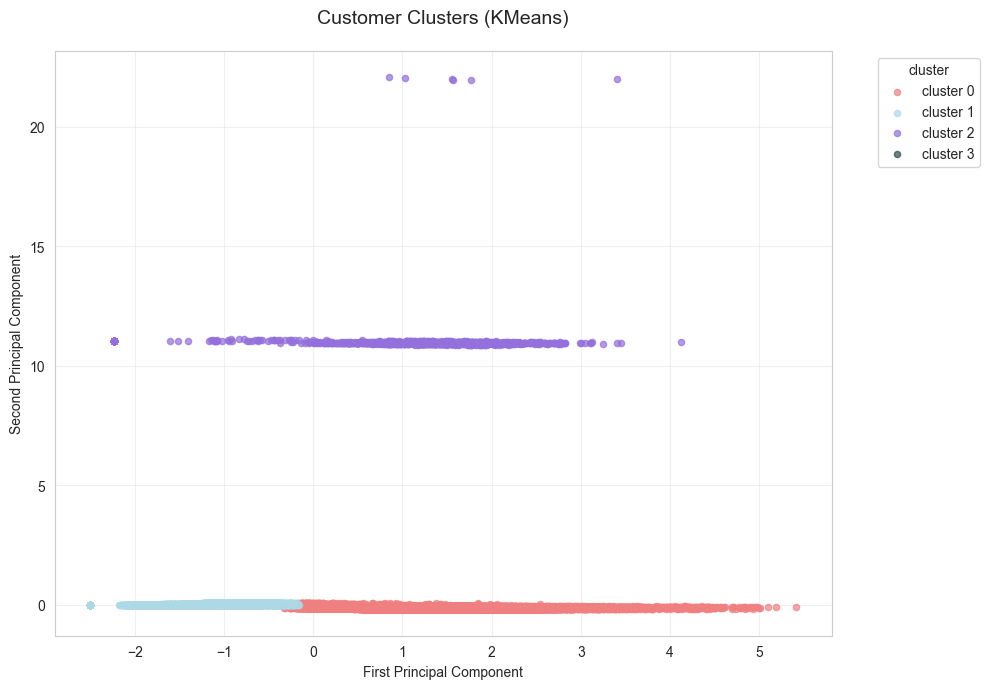

=== CLUSTER ANALYSIS ===

Numerical Features by Cluster:
         Total_Rides  Avg_Distance  Completion_Ratio  Avg_Booking_value  Avg_Rating
cluster                                                                            
0                1.0         25.95              1.00             512.43        4.21
1                1.0          1.59              0.00              70.52        0.00
2                2.0         21.81              0.61             452.91        3.61


Payment Method Distribution by Cluster:
Count of customers by payment method:
Preferred_Payment_Original   Cash  Credit Card  ...  Uber Wallet  Unknown
cluster                                         ...                      
0                           23004         9217  ...        11043        0
1                            1954          816  ...         1051    47210
2                             368          132  ...           65      128

[3 rows x 6 columns]

Percentage distribution:
Preferred_Payment_Origina

In [106]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create the visualization matching your desired style
plt.figure(figsize=(10, 7))
colors = ['lightcoral', 'lightblue', 'mediumpurple', 'darkslategray']
cluster_labels = [0, 1, 2, 3]

for i, cluster in enumerate(cluster_labels):
    cluster_data = X_pca[customer_data["cluster"] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
               c=colors[i], label=f'cluster {cluster}', alpha=0.7, s=20)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Customer Clusters (KMeans)', fontsize=14, pad=20)
plt.legend(title='cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Enhanced cluster analysis with meaningful payment method interpretation
print("=== CLUSTER ANALYSIS ===\n")

# Numerical features summary
numerical_features = ["Total_Rides", "Avg_Distance", "Completion_Ratio", "Avg_Booking_value", "Avg_Rating"]
cluster_summary = customer_data.groupby("cluster")[numerical_features].mean()
print("Numerical Features by Cluster:")
print(cluster_summary.round(2))
print("\n")

# Payment method analysis by cluster (showing actual payment types)
print("Payment Method Distribution by Cluster:")
payment_analysis = customer_data.groupby(['cluster', 'Preferred_Payment_Original']).size().unstack(fill_value=0)
payment_percentages = payment_analysis.div(payment_analysis.sum(axis=1), axis=0) * 100

print("Count of customers by payment method:")
print(payment_analysis)
print("\nPercentage distribution:")
print(payment_percentages.round(1))
print("\n")

# Most preferred payment method per cluster
print("Most Preferred Payment Method per Cluster:")
for cluster in sorted(customer_data['cluster'].unique()):
    cluster_data = customer_data[customer_data['cluster'] == cluster]
    most_common_payment = cluster_data['Preferred_Payment_Original'].mode().iloc[0]
    count = (cluster_data['Preferred_Payment_Original'] == most_common_payment).sum()
    total = len(cluster_data)
    percentage = (count / total) * 100
    
    print(f"Cluster {cluster}: {most_common_payment} ({count}/{total} customers, {percentage:.1f}%)")

- Cluster (VVIP): These are users who always complete their bookings, spend large amounts, and have very good ratings. The company should reward them. Cluster (VIP): These are active users who complete most of their bookings and spend significant amounts, and their ratings are good. The company should recognize and encourage them. Cluster (Completers): These are users who do not complete bookings. The company should target them by providing incentives or making the process easier so that they can complete their bookings.